In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from gross import GrossErrorModel

sns.set_context("talk")

In [2]:
%load_ext autoreload
%autoreload 2

## Data setup

As $\epsilon$ increases, the probability of an outlier increases.

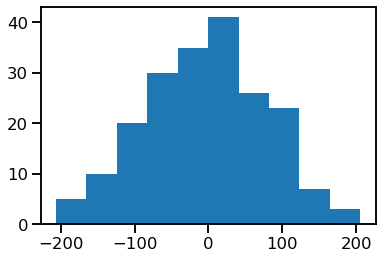

In [3]:
# Sample data with no outliers
gem = GrossErrorModel(n_features=10, n_targets=2, n_informative=5)
X_train, y_train = gem._sample_train(epsilon=0, n_iter=25, n_train=200)

# Plot the distribution of the training labels
plt.hist(y_train[:, 0])
plt.show()

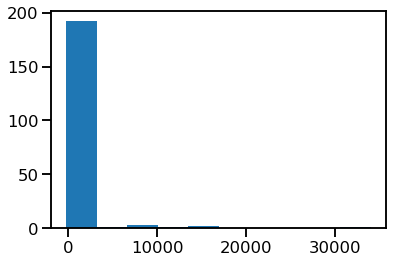

In [4]:
# Sample data with outliers
gem = GrossErrorModel(n_features=10, n_targets=2, n_informative=5, transform=np.square)
X_train, y_train = gem._sample_train(epsilon=0.1, n_iter=25, n_train=200)

# Plot the distribution of the training labels
plt.hist(y_train[:, 0])
plt.show()

## Plot simulation results

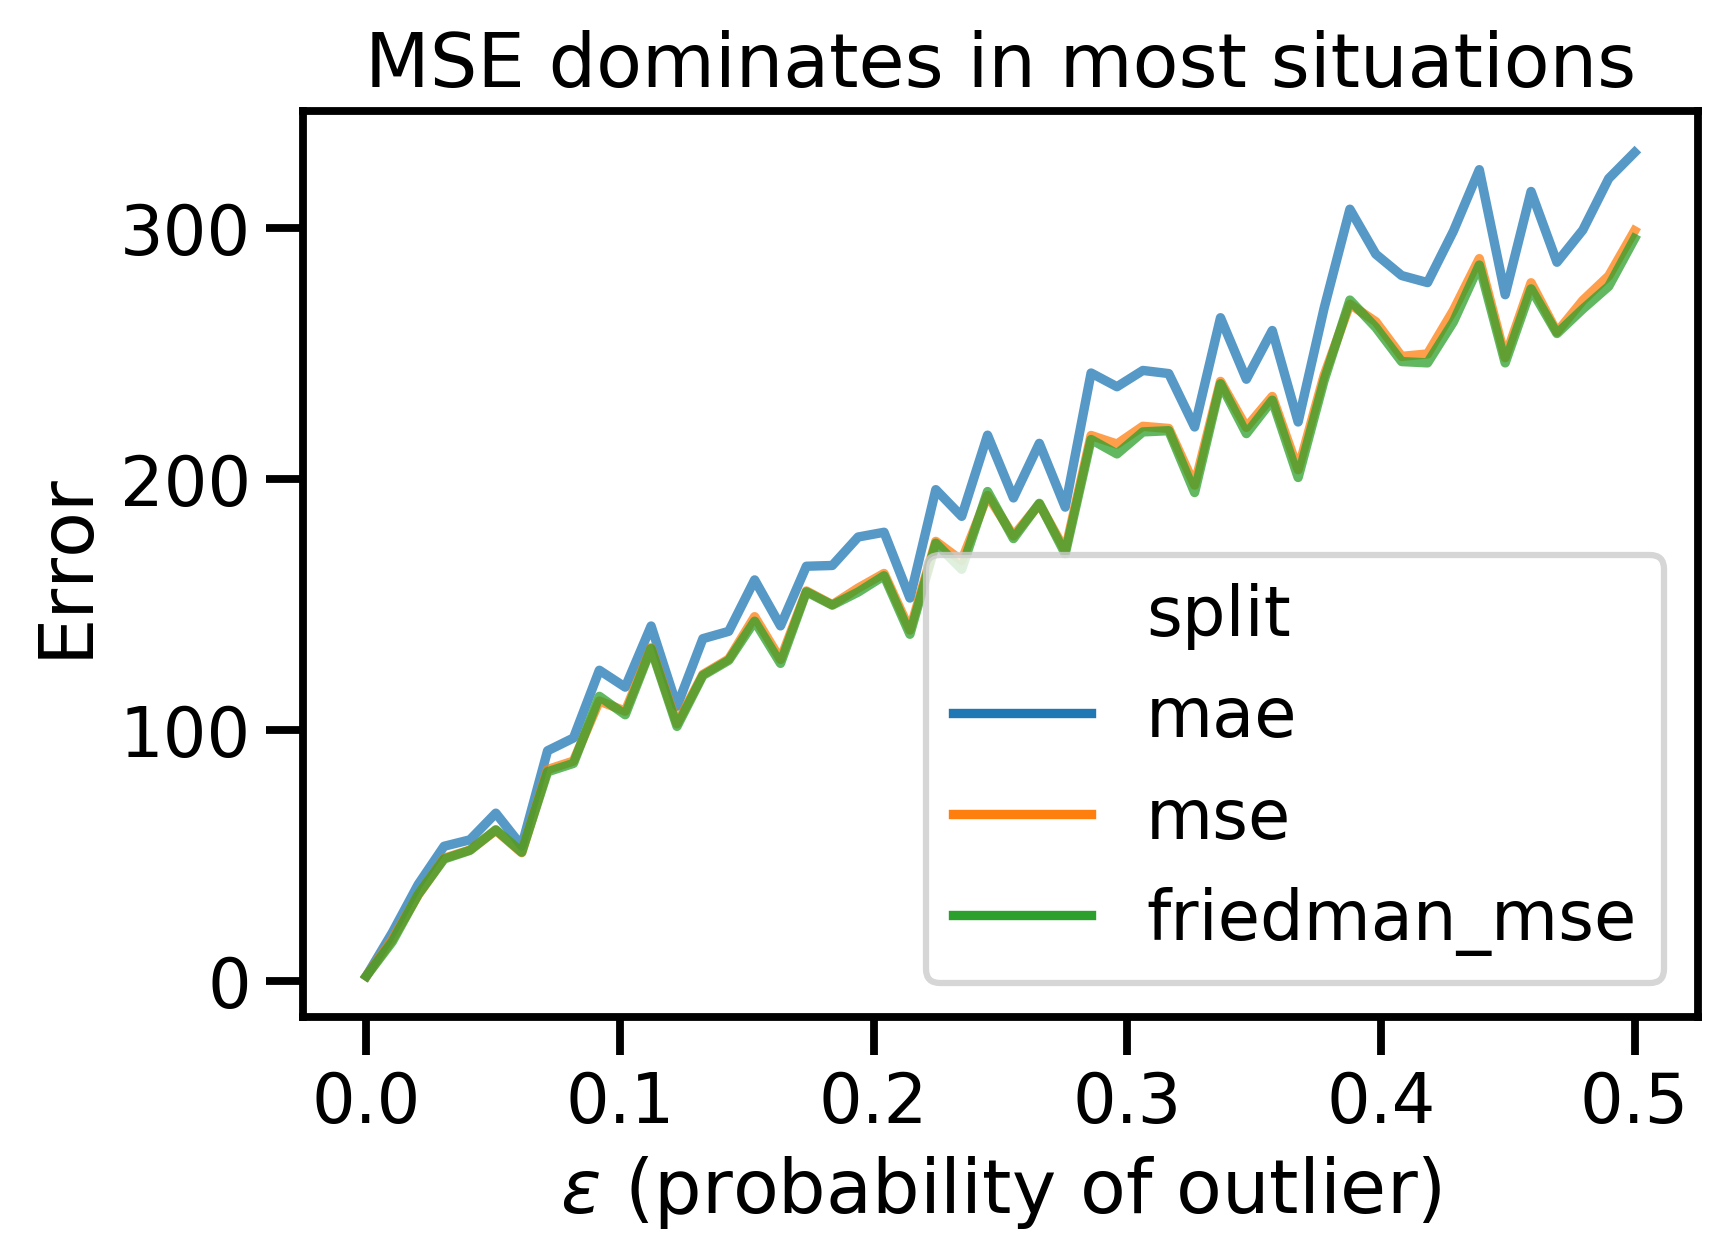

In [5]:
df = pd.read_csv("sim2_results.csv", index_col="Unnamed: 0")
df = pd.melt(
    df,
    id_vars=["n_features", "n_targets", "epsilon"],
    value_vars=["mae", "mse", "friedman_mse"],
    var_name="split",
    value_name="mse",
)
df["split"].str.upper()
df.head()

fig, ax = plt.subplots(dpi=300)
f = sns.lineplot(x="epsilon", y="mse", hue="split", data=df, alpha=0.75, ax=ax)
f.set(
    xlabel=r"$\epsilon$ (probability of outlier)",
    ylabel="Error",
    title="MSE dominates in most situations"
)
plt.show()

In [6]:
df = pd.read_csv("sim3_results.csv", index_col="Unnamed: 0")
df

,n_features,n_targets,epsilon,mae_score,mse_score,friedman_mse_score,mae_std,mse_std,friedman_mse_std
0,10.0,2.0,0.000000,3.375492,3.338357,3.378105,0.025619,0.026006,0.026226
1,10.0,2.0,0.055556,3.446827,3.408613,3.444522,0.023308,0.022490,0.022603
2,10.0,2.0,0.111111,3.516922,3.466870,3.502430,0.029433,0.027968,0.028199
3,10.0,2.0,0.166667,3.613984,3.552777,3.588994,0.025237,0.025116,0.024313
4,10.0,2.0,0.222222,3.645291,3.581774,3.601908,0.029843,0.028757,0.028864
5,10.0,2.0,0.277778,3.683117,3.605589,3.617363,0.024504,0.024851,0.023835
6,10.0,2.0,0.333333,3.744646,3.663921,3.679491,0.023800,0.023050,0.023329
7,10.0,2.0,0.388889,3.833181,3.732945,3.740291,0.021935,0.022133,0.020861
8,10.0,2.0,0.444444,3.513418,3.406911,3.512113,0.018662,0.017903,0.015814
9,10.0,2.0,0.500000,4.199193,4.118096,4.174080,0.021255,0.021575,0.018944


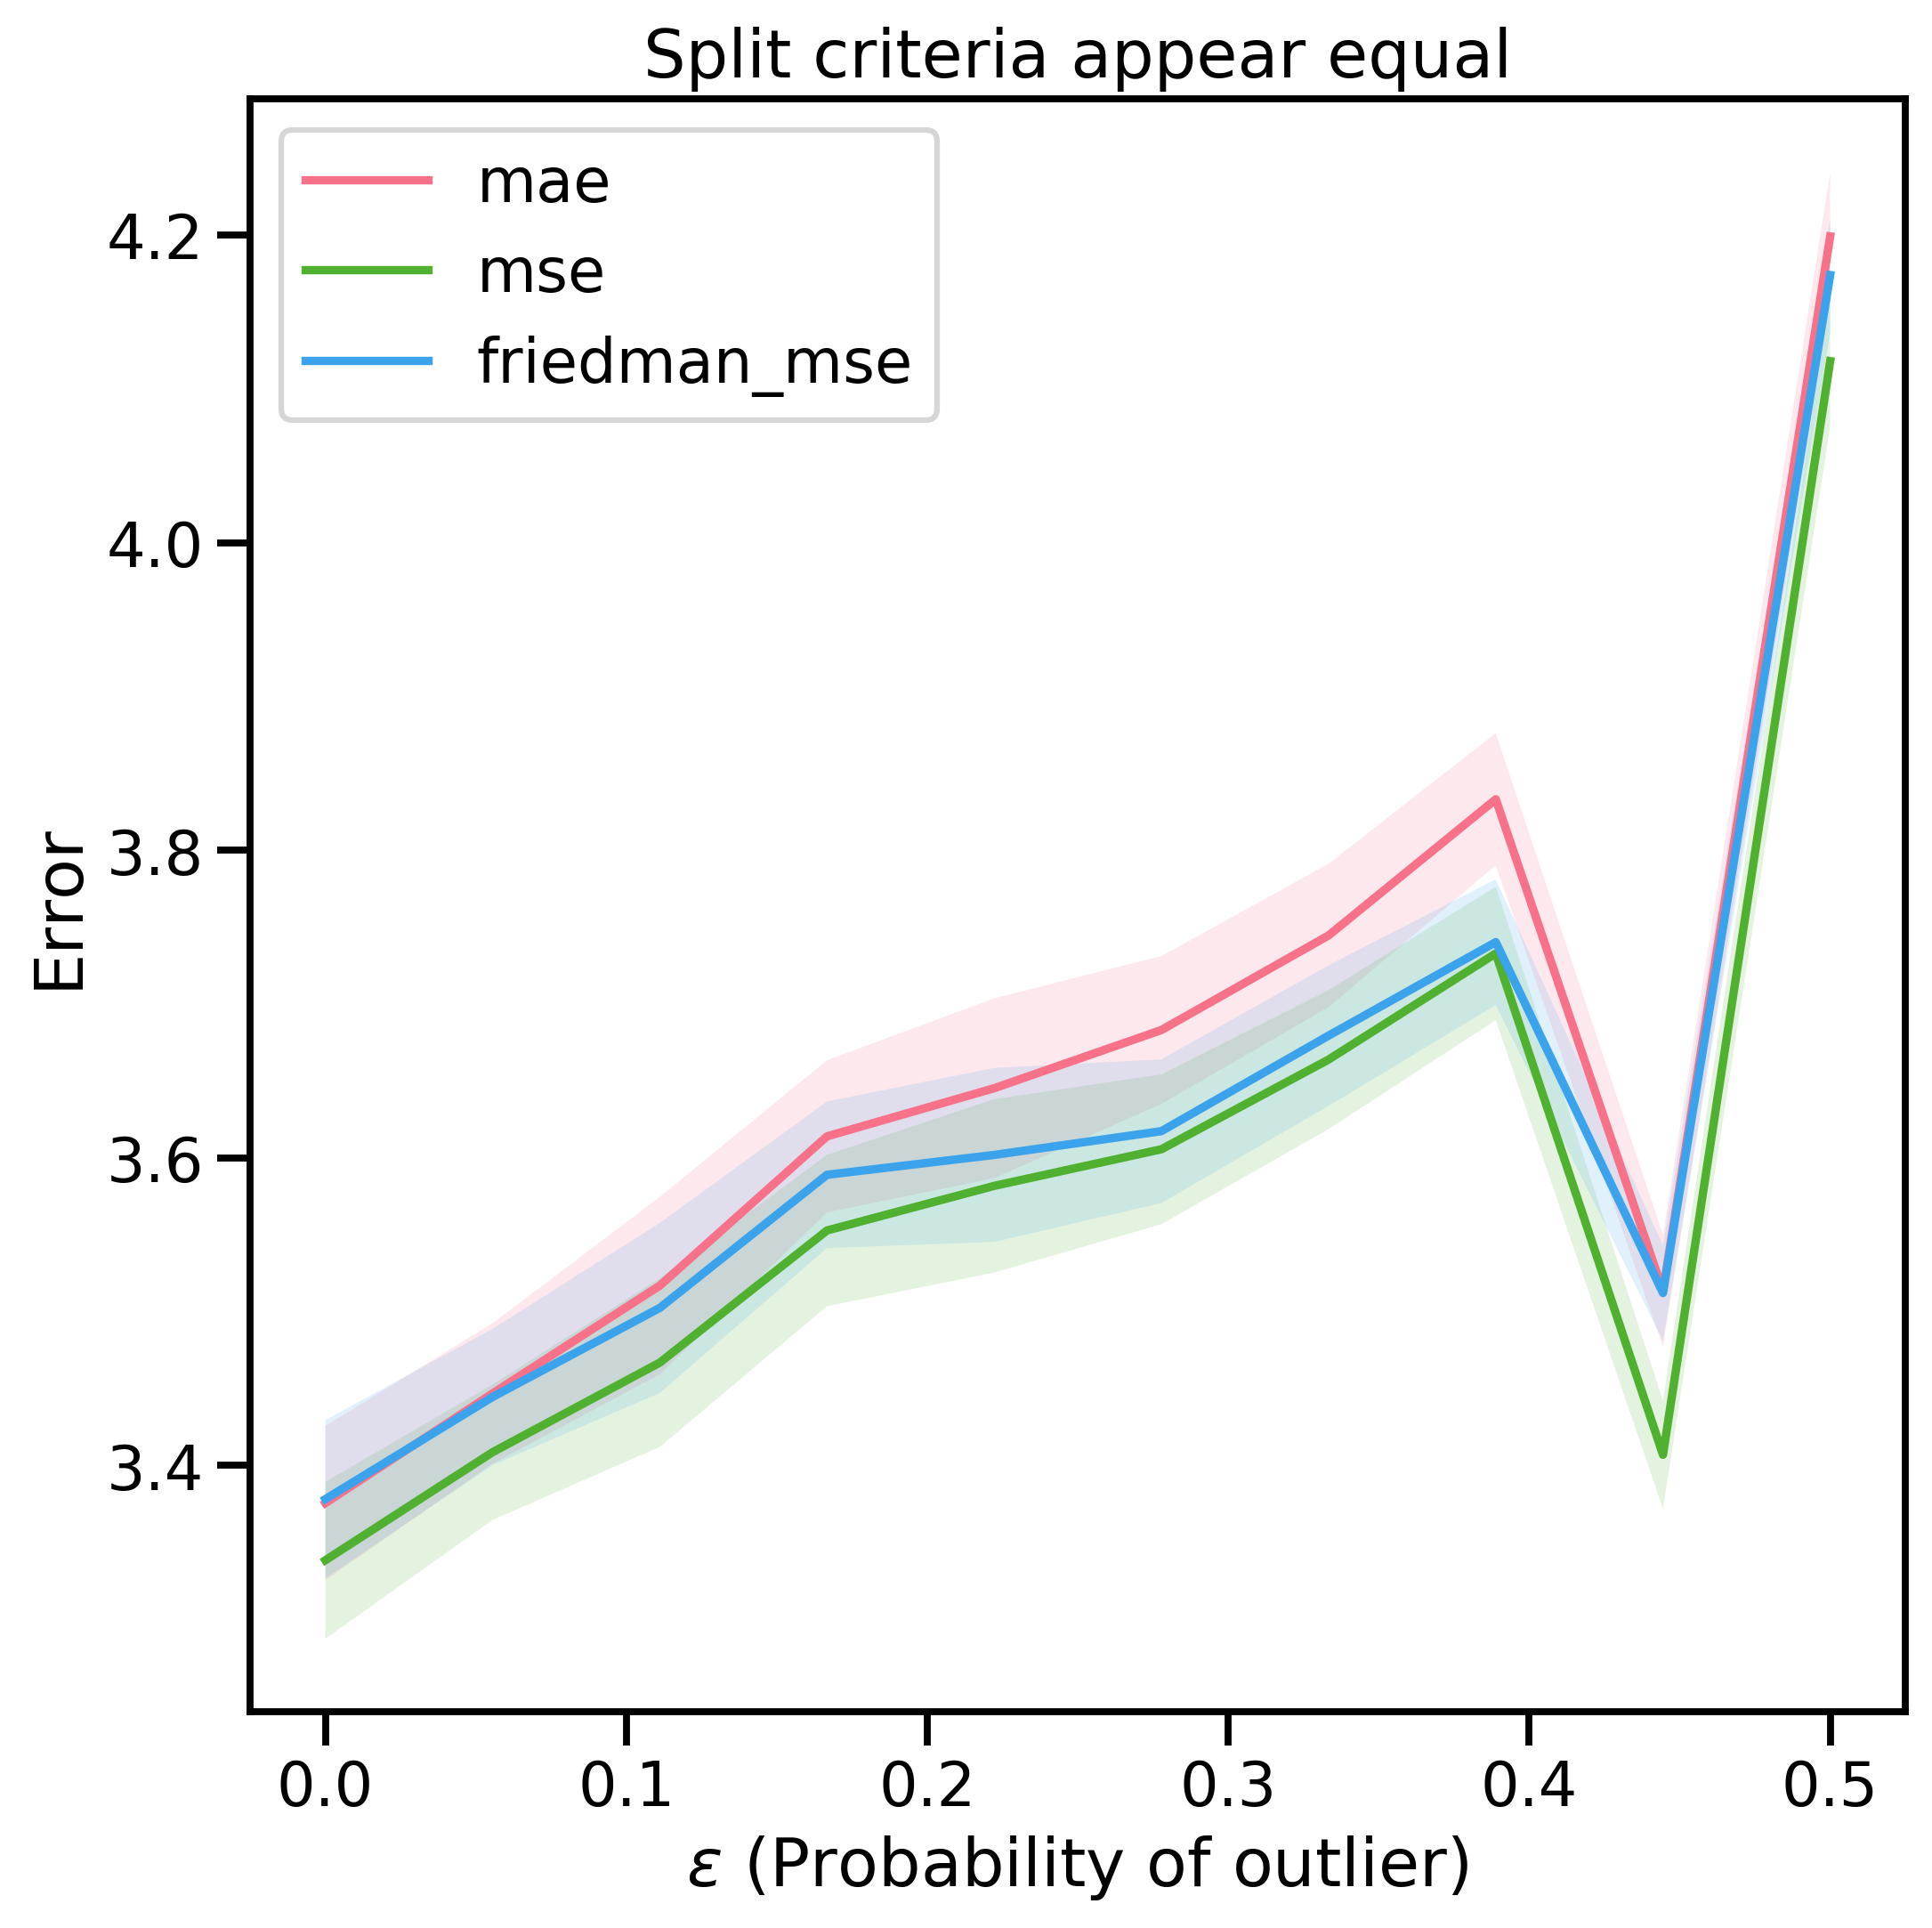

In [8]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
c = sns.color_palette("husl", n_colors=3)

x = df["epsilon"].values

for i, criterion in enumerate(["mae", "mse", "friedman_mse"]):

    col = criterion + "_score"
    y = df[col].values
    ax.plot(x, y, label=criterion, c=c[i])

    col = criterion + "_std"
    errors = df[col].values

    ax.fill_between(
        x=x, 
        y1=y + 1.96 * errors, 
        y2=y - 1.96 * errors, 
        where=(y + 1.96 * errors >= y - 1.96 * errors), 
        facecolor=c[i], 
        alpha=0.15,
        interpolate=True
    )

ax.set(
    xlabel=r"$\epsilon$ (Probability of outlier)",
    ylabel="Error",
    title="Split criteria appear equal",
)

plt.legend()
plt.show()